In [1]:
import numpy as np
from plots.common import plot_asset
from plots.impliedvol import plot_iv

from finmc.calc.impliedvol import iv_surface_mc

from finmc.calc.option import opt_price_mc
from finmc.models.localvol import LVMC

In [2]:
# Define Dataset with zero rate curve, and forward curve.
dataset = {
    "MC": {"PATHS": 100_000, "TIMESTEP": 1 / 20},
    "BASE": "USD",
    "ASSETS": {
        "USD": ("ZERO_RATES", np.array([[2.0, 0.05]])),
        "SPX": ("FORWARD", np.array([[0.0, 5500], [1.0, 5600]])),
    },
    "LV": {"ASSET": "SPX", "VOL": 0.3},
}

In [3]:
model = LVMC(dataset)
price = opt_price_mc(100.0, 1.0, "Call", "SPX", model)
print(price)

5241.737744981186


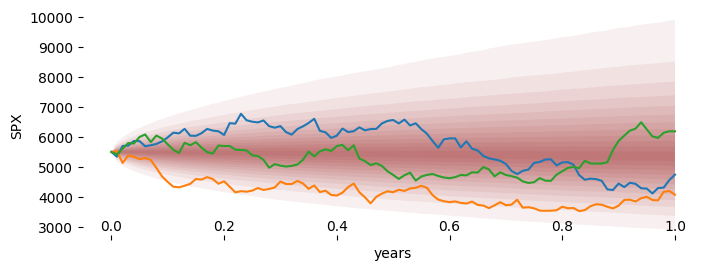

In [4]:
# create the model and plot the progression of short rate
plot_asset(model, "SPX")

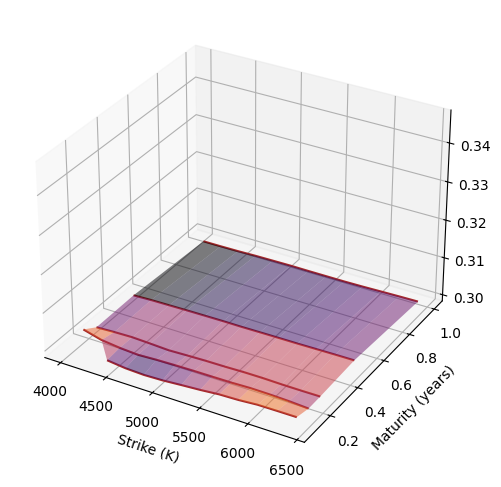

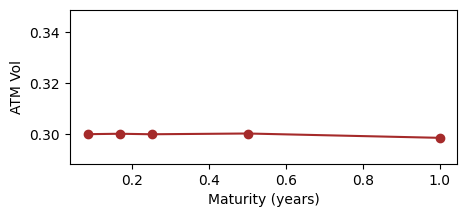

In [5]:
# Calculate the implied volatility surface
strikes = np.linspace(4000, 6400, 13)
expirations = np.array([1 / 12, 1 / 6, 1 / 4, 1 / 2, 1])
surface, atm_vols, fwds = iv_surface_mc(
    strikes,
    expirations,
    asset_name="SPX",
    model=model,
)
plot_iv(strikes, expirations, surface, atm_vols, fwds)